In [ ]:
import os
os.environ["IQM_TOKEN"] = input()

In [2]:
from iqm.qiskit_iqm import IQMProvider

# Instead of setting the environment variable, you could add the token as an argument to the IQMProvider constructor
provider=IQMProvider(url="https://cocos.resonance.meetiqm.com/sirius")
backend = provider.get_backend()

C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\iqm\iqm_server_client\iqm_server_client.py:150: UserWarning: The given IQM Server URL is in a deprecated format, see the client initialization instructions and correct URL format from the server web dashboard.
  warnings.warn(
C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\iqm\iqm_server_client\iqm_server_client.py:171: UserWarning: Resonance CoCoS API is deprecated. Use https://resonance.meetiqm.com. See the Resonance documentation or https://docs.meetiqm.com/iqm-client/ for more detailed instructions.
  warnings.warn(


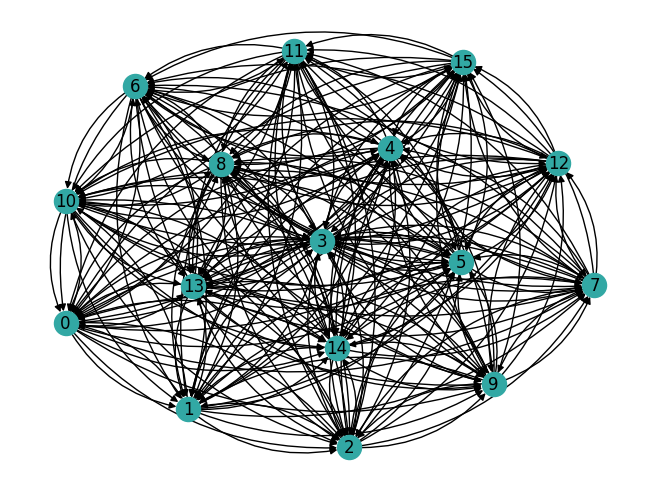

In [3]:
from rustworkx.visualization import mpl_draw
from rustworkx import spring_layout

mpl_draw(backend.coupling_map.graph, arrows=True, with_labels=True, node_color='#32a8a4', pos=spring_layout(backend.coupling_map.graph, num_iter=200))

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
creg c[2];
h q[0];
h q[1];
x q[0];
x q[2];
cx q[0],q[2];
x q[0];
x q[3];
cx q[1],q[3];
ccx q[2],q[3],q[4];
z q[4];
ccx q[2],q[3],q[4];
x q[0];
cx q[0],q[2];
x q[2];
x q[0];
cx q[1],q[3];
x q[3];
h q[0];
h q[1];
x q[4];
x q[0];
x q[1];
h q[4];
ccx q[0],q[1],q[4];
x q[0];
x q[1];
h q[4];
h q[0];
h q[1];
x q[4];
measure q[0] -> c[0];
measure q[1] -> c[1];


"""
circuit = QuantumCircuit.from_qasm_str(qasm)

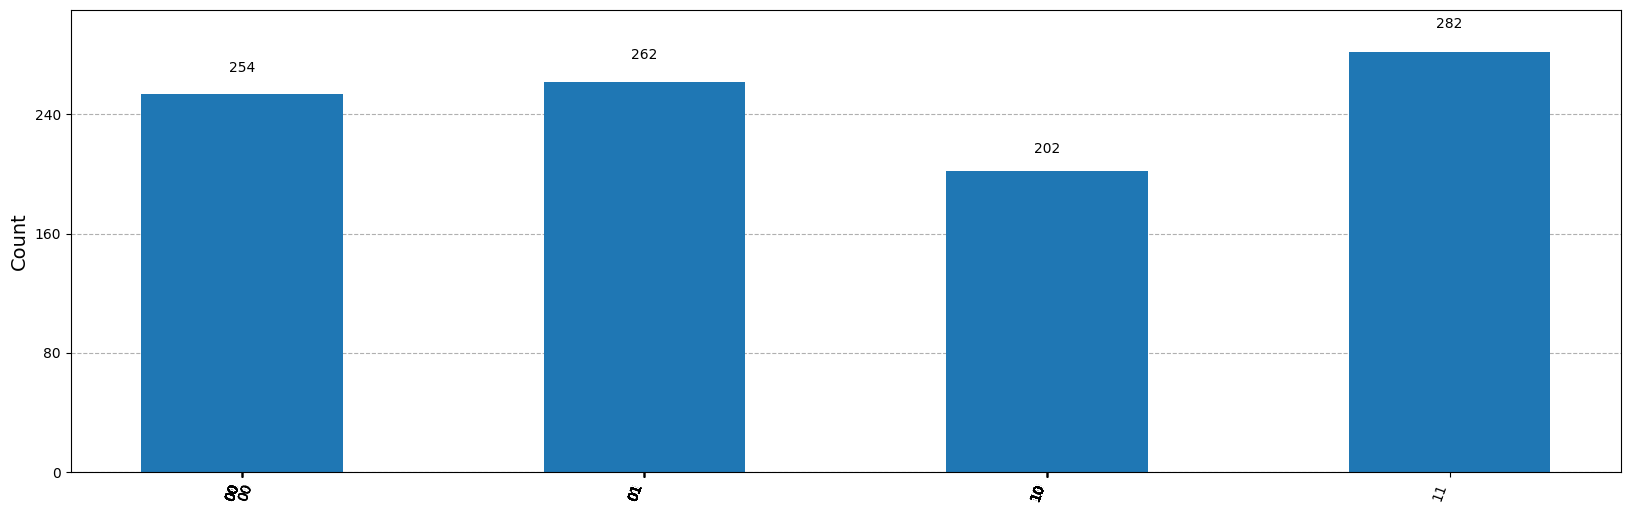

In [5]:
from qiskit import transpile
import matplotlib.pyplot as plt

qc_transpiled = transpile(circuit, backend)
job = backend.run(qc_transpiled, shots=1000)

import qiskit
if qiskit.__version__ < '1.0.0':
    # The job monitor is only compatible with qiskit versions smaller than 1.0
    from qiskit.tools.monitor import job_monitor
    job_monitor(job)

res=job.result()
counts=res.get_counts()

#Plot the results
from qiskit.visualization import plot_histogram
import numpy as np

fig, ax = plt.subplots(figsize=(20, 6))
plot_histogram(counts, ax=ax)

desired_ticks = 2**6   ### decreasing the total number of tick labels to have a clean figure
x_ticks = np.linspace(0, len(counts)-1, desired_ticks, dtype=int)
ax.set_xticks(x_ticks)

plt.show()


In [6]:
from iqm.qiskit_iqm import IQMProvider

# Instead of setting the environment variable, you could add the token as an argument to the IQMProvider constructor
provider=IQMProvider(url="https://cocos.resonance.meetiqm.com/emerald")
backend = provider.get_backend()

C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\iqm\iqm_server_client\iqm_server_client.py:150: UserWarning: The given IQM Server URL is in a deprecated format, see the client initialization instructions and correct URL format from the server web dashboard.
  warnings.warn(
C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\iqm\iqm_server_client\iqm_server_client.py:171: UserWarning: Resonance CoCoS API is deprecated. Use https://resonance.meetiqm.com. See the Resonance documentation or https://docs.meetiqm.com/iqm-client/ for more detailed instructions.
  warnings.warn(


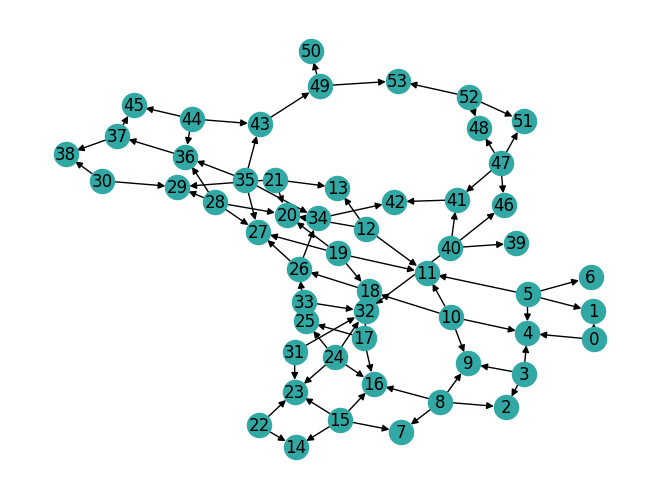

In [7]:
from rustworkx.visualization import mpl_draw
from rustworkx import spring_layout

mpl_draw(backend.coupling_map.graph, arrows=True, with_labels=True, node_color='#32a8a4', pos=spring_layout(backend.coupling_map.graph, num_iter=200))

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
creg c[2];
h q[0];
h q[1];
x q[0];
x q[2];
cx q[0],q[2];
x q[0];
x q[3];
cx q[1],q[3];
ccx q[2],q[3],q[4];
z q[4];
ccx q[2],q[3],q[4];
x q[0];
cx q[0],q[2];
x q[2];
x q[0];
cx q[1],q[3];
x q[3];
h q[0];
h q[1];
x q[4];
x q[0];
x q[1];
h q[4];
ccx q[0],q[1],q[4];
x q[0];
x q[1];
h q[4];
h q[0];
h q[1];
x q[4];
measure q[0] -> c[0];
measure q[1] -> c[1];


"""
circuit = QuantumCircuit.from_qasm_str(qasm)

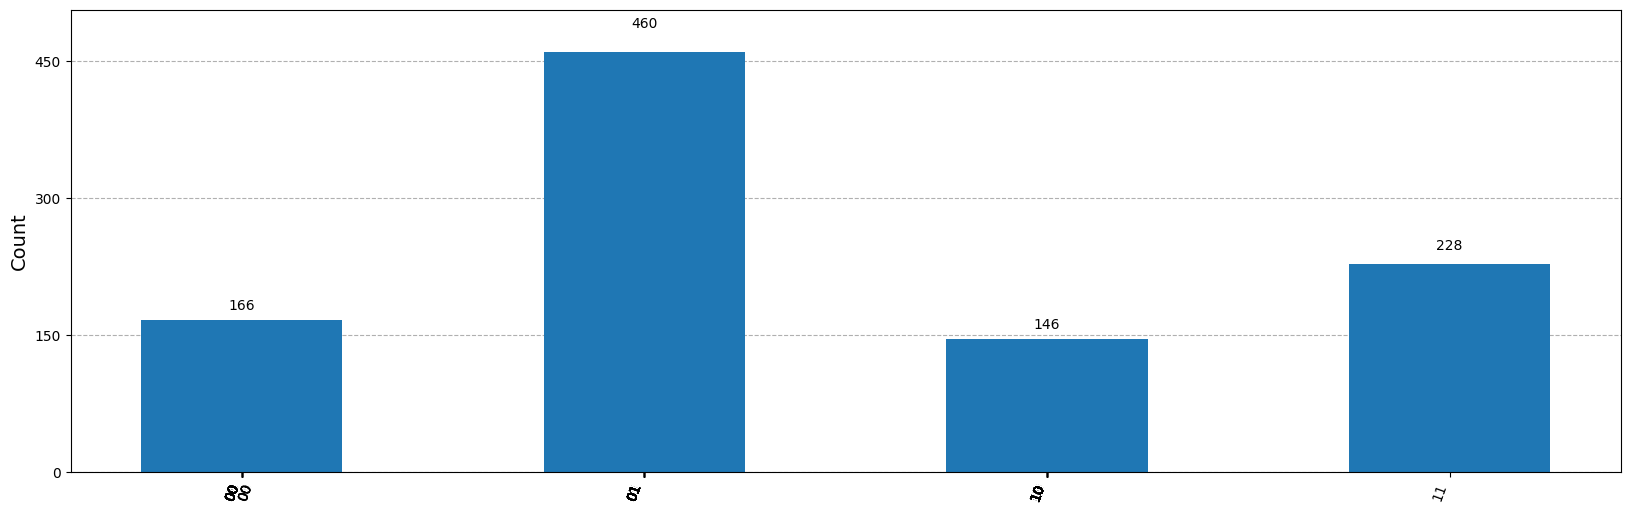

In [9]:
from qiskit import transpile
import matplotlib.pyplot as plt

qc_transpiled = transpile(circuit, backend)
job = backend.run(qc_transpiled, shots=1000)

import qiskit
if qiskit.__version__ < '1.0.0':
    # The job monitor is only compatible with qiskit versions smaller than 1.0
    from qiskit.tools.monitor import job_monitor
    job_monitor(job)

res=job.result()
counts=res.get_counts()

#Plot the results
from qiskit.visualization import plot_histogram
import numpy as np

fig, ax = plt.subplots(figsize=(20, 6))
plot_histogram(counts, ax=ax)

desired_ticks = 2**6   ### decreasing the total number of tick labels to have a clean figure
x_ticks = np.linspace(0, len(counts)-1, desired_ticks, dtype=int)
ax.set_xticks(x_ticks)

plt.show()


In [10]:
from iqm.qiskit_iqm import IQMProvider

# Instead of setting the environment variable, you could add the token as an argument to the IQMProvider constructor
provider=IQMProvider(url="https://cocos.resonance.meetiqm.com/garnet")
backend = provider.get_backend()

C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\iqm\iqm_server_client\iqm_server_client.py:150: UserWarning: The given IQM Server URL is in a deprecated format, see the client initialization instructions and correct URL format from the server web dashboard.
  warnings.warn(
C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\iqm\iqm_server_client\iqm_server_client.py:171: UserWarning: Resonance CoCoS API is deprecated. Use https://resonance.meetiqm.com. See the Resonance documentation or https://docs.meetiqm.com/iqm-client/ for more detailed instructions.
  warnings.warn(


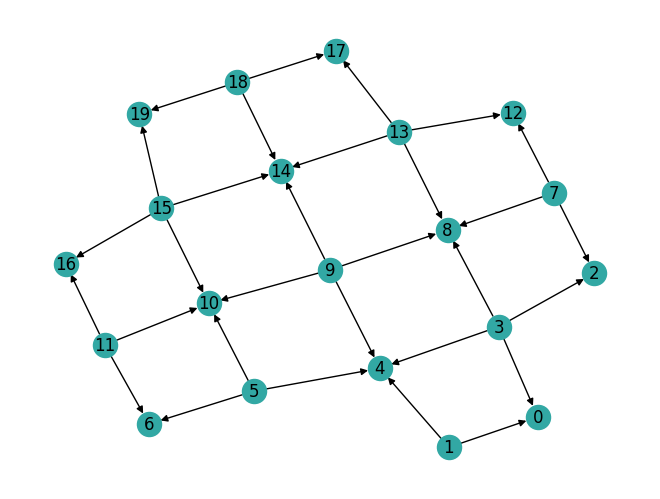

In [11]:
from rustworkx.visualization import mpl_draw
from rustworkx import spring_layout

mpl_draw(backend.coupling_map.graph, arrows=True, with_labels=True, node_color='#32a8a4', pos=spring_layout(backend.coupling_map.graph, num_iter=200))

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
creg c[2];
h q[0];
h q[1];
x q[0];
x q[2];
cx q[0],q[2];
x q[0];
x q[3];
cx q[1],q[3];
ccx q[2],q[3],q[4];
z q[4];
ccx q[2],q[3],q[4];
x q[0];
cx q[0],q[2];
x q[2];
x q[0];
cx q[1],q[3];
x q[3];
h q[0];
h q[1];
x q[4];
x q[0];
x q[1];
h q[4];
ccx q[0],q[1],q[4];
x q[0];
x q[1];
h q[4];
h q[0];
h q[1];
x q[4];
measure q[0] -> c[0];
measure q[1] -> c[1];


"""
circuit = QuantumCircuit.from_qasm_str(qasm)

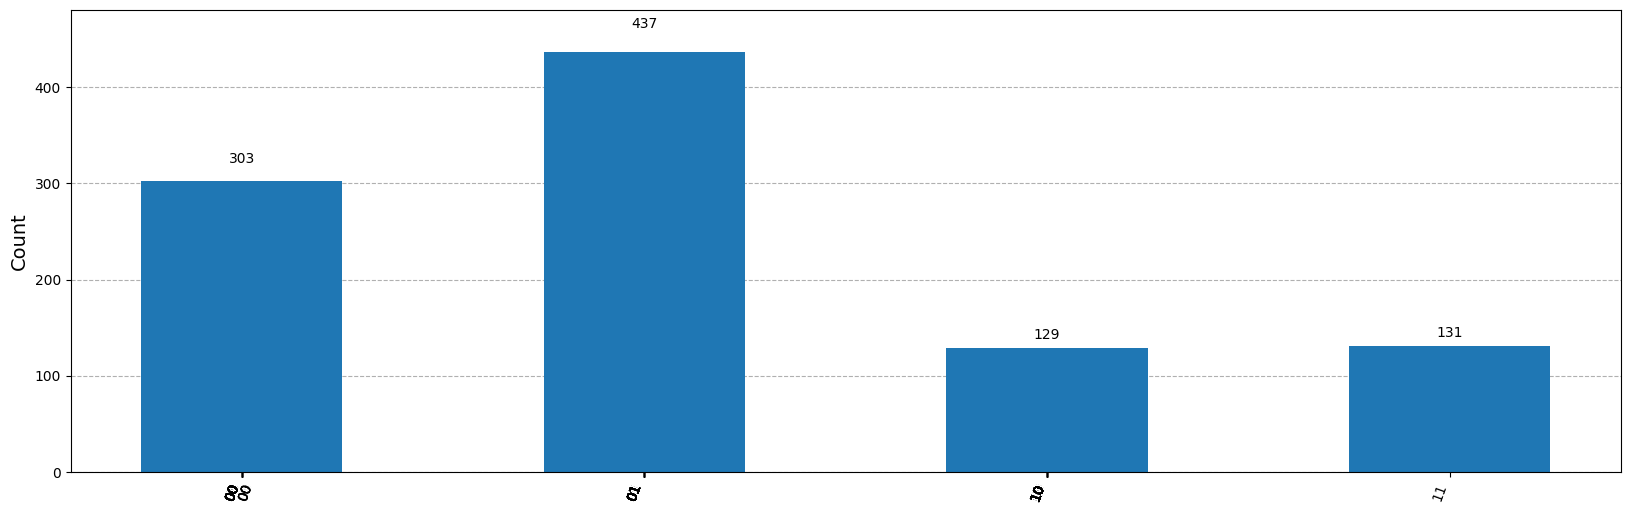

In [13]:
from qiskit import transpile
import matplotlib.pyplot as plt

qc_transpiled = transpile(circuit, backend)
job = backend.run(qc_transpiled, shots=1000)

import qiskit
if qiskit.__version__ < '1.0.0':
    # The job monitor is only compatible with qiskit versions smaller than 1.0
    from qiskit.tools.monitor import job_monitor
    job_monitor(job)

res=job.result()
counts=res.get_counts()

#Plot the results
from qiskit.visualization import plot_histogram
import numpy as np

fig, ax = plt.subplots(figsize=(20, 6))
plot_histogram(counts, ax=ax)

desired_ticks = 2**6   ### decreasing the total number of tick labels to have a clean figure
x_ticks = np.linspace(0, len(counts)-1, desired_ticks, dtype=int)
ax.set_xticks(x_ticks)

plt.show()
